In [1]:
# import torch
# import torchvision
import torchvision.datasets as datasets
import numpy as np

c:\users\ariha\appdata\local\programs\python\python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

def one_hot(x):
    temp = np.zeros(10, dtype=np.float)
    temp[x] = 1
    return temp

def transform(x):
    return np.array(x)/255.0

In [3]:

mnist_trainset = datasets.MNIST(root='./data', train = True , download=True, transform=transform, target_transform = one_hot)
mnist_testset = datasets.MNIST(root='./data', train = False ,download=True, transform=transform, target_transform = one_hot)


Text(0.5, 1.0, 'image index 10 label 3')

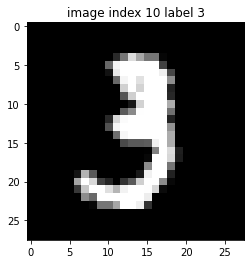

In [4]:
import matplotlib.pyplot as plt
i=10
plt.imshow(mnist_trainset.data[i],cmap='gray')
plt.title("image index " + str(i) + " label " + str(mnist_trainset.targets[i].item()) )

In [5]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_testset, batch_size=64, shuffle=True)

In [10]:
IP_L = mnist_trainset.data[i].flatten().shape[0]
H1_L = 500
H2_L = 250
H3_L = 100
OP_L = mnist_trainset.train_labels.unique().shape[0]

layers_dims = [IP_L,H1_L,H2_L,H3_L,OP_L]
from scipy.special import softmax

def initialize_parameters(layer_dims,random = False):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        
        if random == True:
            parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
            parameters['b' + str(l)] = np.random.randn(layer_dims[l], 1)
            
        else:
            parameters['W' + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
            
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)


def forward_pass(img,parameters):
    
    forward_pass = {}
    L = int (len(parameters)/2)
    
    forward_pass['Z1'] = ( np.dot(parameters['W1'],img) + (parameters['b1']) )
    
    for i in range(2,L+1):
        
        forward_pass['A' + str(i-1)] =(sigmoid(forward_pass['Z' + str(i-1)]))
        forward_pass['Z' + str(i)] =( np.dot(parameters['W'+ str(i)],forward_pass['A' + str(i-1)]) + (parameters['b' + str(i)]) )
        
    forward_pass['A' + str(L)] = (softmax(forward_pass['Z' + str(L)],axis = 0))
    
    cache = (forward_pass,parameters)
    
    return forward_pass['A' + str(L)],cache

def back_prop(X,Y,cache):
    
    m = X.shape[1]
    
    forward_pass,parameters = cache
    L = len(parameters)//2
    
    grads = {}
    
    grads['dZ' + str(L)] = forward_pass['A' + str(L)] - Y
    
    
    for i in range(L-1,0,-1):
        
        grads['dW' + str(i+1)] = 1./m * np.dot(grads['dZ' + str(i+1)],forward_pass['A' + str(i)].T)
        grads['db' + str(i+1)] = 1./m * np.sum(grads['dZ' + str(i+1)],axis=1,keepdims = True)
        grads['dA' + str(i)] = np.dot(parameters['W' + str(i+1)].T,grads['dZ' + str(i+1)])
        grads['dZ' + str(i)] = grads['dA' + str(i)]*forward_pass['A' + str(i)]*(1-forward_pass['A' + str(i)])
    
    grads['dW1'] = 1./m * np.dot(grads['dZ1'],X.T)
    grads['db1'] = 1./m * np.sum(grads['dZ1'],axis=1,keepdims = True)

    return grads


def update_parameters(parameters,grads,learning_rate,lambd = 0):
    
    L = len(parameters)//2
    
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - (learning_rate * grads["dW" + str(k+1)] + lambd*parameters["W" + str(k+1)])
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - (learning_rate * grads["db" + str(k+1)])
        
    return parameters

def compute_cost(a3 , Y):
    
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

In [11]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

train_X = np.swapaxes(np.array(train_features),0,2).reshape(784,64)
train_Y = np.swapaxes(np.array(train_labels),0,1)
parameters = initialize_parameters(layers_dims,True)
predict , cache = forward_pass(train_X,parameters)
pass_ = back_prop(train_X,train_Y,cache)

C:\Users\ariha\AppData\Local\Temp\ipykernel_15400\3778725111.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp = np.zeros(10, dtype=np.float)


In [12]:
pass_['dZ1'].shape

(500, 64)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.05087868 0.06518555 0.02220471 0.40901382 0.08447932 0.18751158
 0.13183181 0.01235846 0.02688758 0.0096485 ]


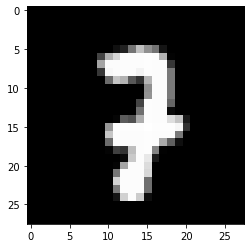

In [13]:
i=10
plt.imshow(np.swapaxes(train_X[:,i].reshape(28,28),0,1),cmap='gray')
print(str(train_Y[:,i]))
print(predict[:,i])

In [14]:
cache[0].keys()

dict_keys(['Z1', 'A1', 'Z2', 'A2', 'Z3', 'A3', 'Z4', 'A4'])

In [15]:
cache[1].keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])

In [16]:
pass_.keys()

dict_keys(['dZ4', 'dW4', 'db4', 'dA3', 'dZ3', 'dW3', 'db3', 'dA2', 'dZ2', 'dW2', 'db2', 'dA1', 'dZ1', 'dW1', 'db1'])

In [17]:
train_dataloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_testset, batch_size=64, shuffle=True)

In [18]:
def model(batch_size = 64,learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0,random = False):
    
    grads = {}
    costs = []
    m = batch_size
    layers_dims = [IP_L, H1_L, H2_L, H3_L,OP_L]
    
    parameters = initialize_parameters(layers_dims,random)
    
    for i in range(num_iterations):
        
        batch_x, batch_y = next(iter(train_dataloader))
        X = np.swapaxes(np.array(batch_x),0,2).reshape(784,64)
        Y = np.swapaxes(np.array(batch_y),0,1)
        a3, cache = forward_pass(X, parameters)
        
        cost = compute_cost(a3, Y)
    
        grads = back_prop(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate,lambd = lambd)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [19]:
learned_parameters={}

In [ ]:
parameters = model(num_iterations = 30000,random = True)

C:\Users\ariha\AppData\Local\Temp\ipykernel_15400\3778725111.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp = np.zeros(10, dtype=np.float)


Cost after iteration 0: 3.9838225486513466
Cost after iteration 10000: 0.135153097097355


In [ ]:
i=10
plt.imshow(np.swapaxes(train_X[:,i].reshape(28,28),0,1),cmap='gray')
print("Label ",np.where(train_Y[:,i] == train_Y[:,i].max())[0][0])
print("Prediction ",np.where(forward_pass(train_X,parameters)[0][:,i] == forward_pass(train_X,parameters)[0][:,i].max())[0][0])

In [ ]:
learning_rate = 0.5
lambd = 2
batch_size = 64
model_name = "L=" + str(learning_rate) + ",R=" + str(lambd) + ",BS=" + str(batch_size)
print(model_name)
learned_parameters[model_name] = model(batch_size = batch_size,learning_rate = learning_rate, num_iterations = 30000, print_cost = True, lambd = lambd,random = False)

In [ ]:
learning_rate = 0.3
lambd = 0
batch_size = 64
model_name = "L=" + str(learning_rate) + ",R=" + str(lambd) + ",BS=" + str(batch_size)
print(model_name)
learned_parameters[model_name] = model(batch_size = batch_size,learning_rate = learning_rate, num_iterations = 30000, print_cost = True, lambd = lambd,random = False)